<a href="https://colab.research.google.com/github/leonardogolinelli/small_RNA_velocity_project/blob/main/RNA_velocity_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

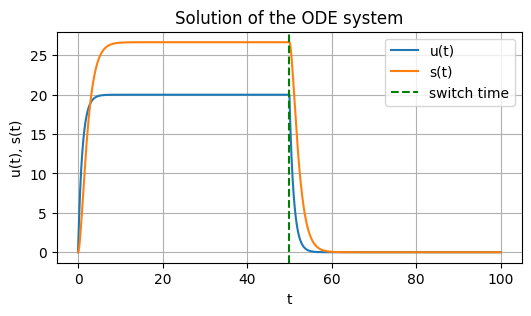

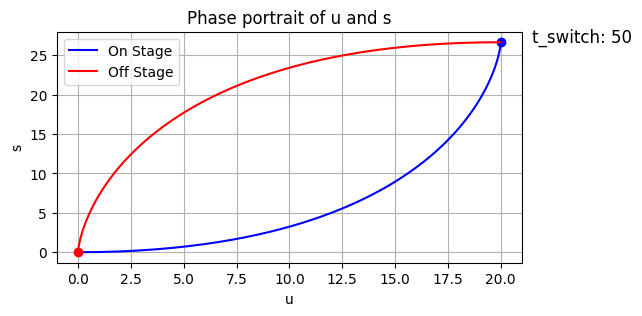

In [112]:
import numpy as np
import matplotlib.pyplot as plt

def on_stage_solution(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

def off_stage_solution(t, u_switch, s_switch, beta, gamma):
    # specify your analytical solution for the off_stage here
    u =  u_switch*np.exp(-beta*(t-t_switch))
    s =  s_switch*np.exp(-gamma*(t-t_switch)) - ((beta * u_switch/(gamma-beta))) * (np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))
    return u, s

def simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma):
    # on_stage
    t_on = np.linspace(0, t_switch, 1000)
    #alfa_on = np.sin(t_on/5)
    u_on, s_on = on_stage_solution(t_on, u0, s0, alfa_on, beta, gamma)

    # extract final condition after on_stage
    u_switch, s_switch = on_stage_solution(t_switch, u0, s0, alfa_on, beta, gamma)

    # off_stage
    t_off = np.linspace(t_switch, t_final, 1000)
    u_off, s_off = off_stage_solution(t_off, u_switch, s_switch, beta, gamma)

    # combine solutions
    t = np.concatenate((t_on, t_off))
    u = np.concatenate((u_on, u_off))
    s = np.concatenate((s_on, s_off))

    return t, u, s

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 50
t_final = 100
alfa_on = 20
beta = 1
gamma = 0.75

t, u, s = simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma)

# plotting the solutions
plt.figure(figsize=(6, 3))
plt.plot(t, u, label='u(t)')
plt.plot(t, s, label='s(t)')
plt.axvline(x = t_switch, color='green', linestyle='--', label = 'switch time')
plt.legend()
plt.grid(True)
plt.title('Solution of the ODE system')
plt.xlabel('t')
plt.ylabel('u(t), s(t)')
plt.show()

plt.figure(figsize=(6, 3))

# Plot on stage (use color blue for 'on-stage')
plt.plot(u[:1000], s[:1000], 'b-', label='On Stage')

# Mark the point at the end of on stage
plt.plot(u[999], s[999], 'bo')

# Plot off stage (use color red for 'off-stage')
plt.plot(u[1000:], s[1000:], 'r-', label='Off Stage')

# Mark the point at the end of off stage
plt.plot(u[-1], s[-1], 'ro')

plt.grid(True)
plt.title('Phase portrait of u and s')
plt.xlabel('u')
plt.ylabel('s')
plt.legend()
plt.text(x=u[999]+1.5, y=s[999], s=f't_switch: {t_switch}', fontsize=12)
plt.show()


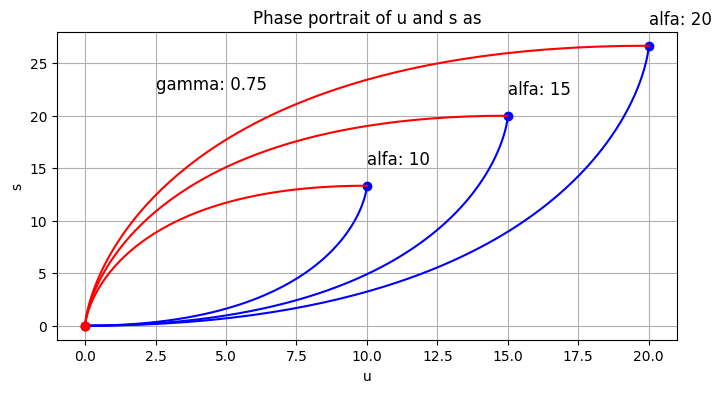

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def on_stage_solution(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

def off_stage_solution(t, u_switch, s_switch, beta, gamma):
    # specify your analytical solution for the off_stage here
    u =  u_switch*np.exp(-beta*(t-t_switch))
    s =  s_switch*np.exp(-gamma*(t-t_switch)) - ((beta * u_switch/(gamma-beta))) * (np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))
    return u, s

def simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma):
    # on_stage
    t_on = np.linspace(0, t_switch, 1000)
    #alfa_on = np.sin(t_on/5)
    u_on, s_on = on_stage_solution(t_on, u0, s0, alfa_on, beta, gamma)

    # extract final condition after on_stage
    u_switch, s_switch = on_stage_solution(t_switch, u0, s0, alfa_on, beta, gamma)

    # off_stage
    t_off = np.linspace(t_switch, t_final, 1000)
    u_off, s_off = off_stage_solution(t_off, u_switch, s_switch, beta, gamma)

    # combine solutions
    t = np.concatenate((t_on, t_off))
    u = np.concatenate((u_on, u_off))
    s = np.concatenate((s_on, s_off))

    return t, u, s

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 50
t_final = 100
alfa_on_vals = [10, 15, 20]
beta = 1
gamma = 0.75

plt.figure(figsize=(8, 4))

for alfa_on in alfa_on_vals:
  t, u, s = simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma)

  # Plot on stage (use color blue for 'on-stage')
  plt.plot(u[:1000], s[:1000], 'b-', label=f'alfa: {alfa_on}')

  # Mark the point at the end of on stage
  plt.plot(u[999], s[999], 'bo')

  # Plot off stage (use color red for 'off-stage')
  plt.plot(u[1000:], s[1000:], 'r-', label=f'alfa: {alfa_on}')

  # Mark the point at the end of off stage
  plt.plot(u[-1], s[-1], 'ro')

  plt.text(x=u[999-3], y=s[999]+2, s=f'alfa: {alfa_on}', fontsize=12)

plt.grid(True)
plt.title('Phase portrait of u and s as')
plt.xlabel('u')
plt.ylabel('s')
plt.text(x=2.5, y=22.5, s=f'gamma: {gamma}', fontsize=12)
#plt.legend()
plt.show()


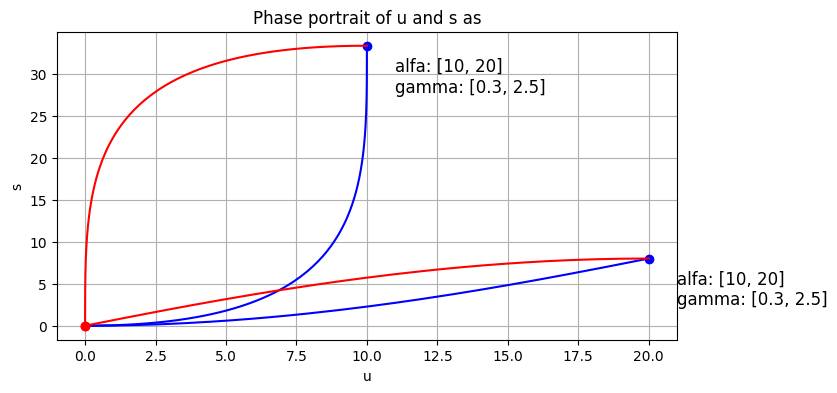

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def on_stage_solution(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

def off_stage_solution(t, u_switch, s_switch, beta, gamma):
    # specify your analytical solution for the off_stage here
    u =  u_switch*np.exp(-beta*(t-t_switch))
    s =  s_switch*np.exp(-gamma*(t-t_switch)) - ((beta * u_switch/(gamma-beta))) * (np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))
    return u, s

def simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma):
    # on_stage
    t_on = np.linspace(0, t_switch, 1000)
    #alfa_on = np.sin(t_on/5)
    u_on, s_on = on_stage_solution(t_on, u0, s0, alfa_on, beta, gamma)

    # extract final condition after on_stage
    u_switch, s_switch = on_stage_solution(t_switch, u0, s0, alfa_on, beta, gamma)

    # off_stage
    t_off = np.linspace(t_switch, t_final, 1000)
    u_off, s_off = off_stage_solution(t_off, u_switch, s_switch, beta, gamma)

    # combine solutions
    t = np.concatenate((t_on, t_off))
    u = np.concatenate((u_on, u_off))
    s = np.concatenate((s_on, s_off))

    return t, u, s

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 50
t_final = 100
alfa_on = [10, 20]
beta = 1
gamma = [0.3, 2.5]

plt.figure(figsize=(8, 4))

for i in range(2):
  t, u, s = simulation(u0, s0, t_switch, t_final, alfa_on[i], beta, gamma[i])

  # Plot on stage (use color blue for 'on-stage')
  plt.plot(u[:1000], s[:1000], 'b-', label=f'alfa: {alfa_on}')

  # Mark the point at the end of on stage
  plt.plot(u[999], s[999], 'bo')

  # Plot off stage (use color red for 'off-stage')
  plt.plot(u[1000:], s[1000:], 'r-', label=f'alfa: {alfa_on}')

  # Mark the point at the end of off stage
  plt.plot(u[-1], s[-1], 'ro')

  plt.text(x=u[999]+1, y=s[999]-3, s=f'alfa: {alfa_on}', fontsize=12)
  plt.text(x=u[999]+1, y=s[999]-5.5, s=f'gamma: {gamma}', fontsize=12)

plt.grid(True)
plt.title('Phase portrait of u and s as')
plt.xlabel('u')
plt.ylabel('s')
#plt.legend()
plt.show()


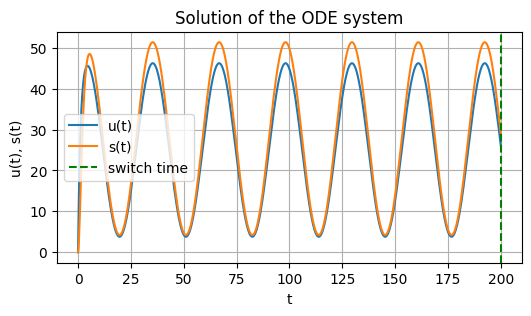

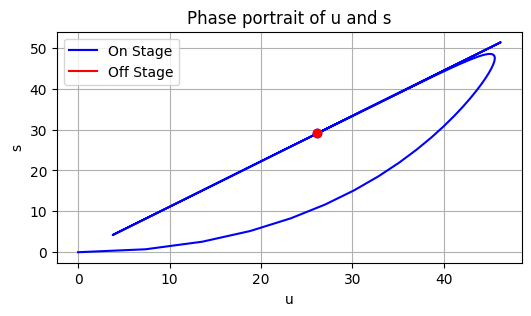

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def on_stage_solution(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

def off_stage_solution(t, u_switch, s_switch, beta, gamma):
    # specify your analytical solution for the off_stage here
    u =  u_switch*np.exp(-beta*(t-t_switch))
    s =  s_switch*np.exp(-gamma*(t-t_switch)) - ((beta * u_switch/(gamma-beta))) * (np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))
    return u, s

def simulation(u0, s0, t_switch, t_final, beta, gamma):
    # on_stage
    t_on = np.linspace(0, t_switch, 1000)
    alfa_on = 25 + 15 * (np.sin(t_on/5) + np.cos(t_on/5))
    u, s = on_stage_solution(t_on, u0, s0, alfa_on, beta, gamma)

    return t_on, u, s

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 200
t_final = 200
beta = 1
gamma = 0.9

t, u, s = simulation(u0, s0, t_switch, t_final, beta, gamma)

# plotting the solutions
plt.figure(figsize=(6, 3))
plt.plot(t, u, label='u(t)')
plt.plot(t, s, label='s(t)')
plt.axvline(x = t_switch, color='green', linestyle='--', label = 'switch time')
plt.legend()
plt.grid(True)
plt.title('Solution of the ODE system')
plt.xlabel('t')
plt.ylabel('u(t), s(t)')
plt.show()

plt.figure(figsize=(6, 3))

# Plot on stage (use color blue for 'on-stage')
plt.plot(u[:1000], s[:1000], 'b-', label='On Stage')

# Mark the point at the end of on stage
plt.plot(u[999], s[999], 'bo')

# Plot off stage (use color red for 'off-stage')
plt.plot(u[1000:], s[1000:], 'r-', label='Off Stage')

# Mark the point at the end of off stage
plt.plot(u[-1], s[-1], 'ro')

plt.grid(True)
plt.title('Phase portrait of u and s')
plt.xlabel('u')
plt.ylabel('s')
plt.legend()
plt.show()
